# Cat and Dog Image Classification

This notebook implements a Convolutional Neural Network (CNN) to classify images of cats and dogs.

In [3]:
print("Hello World!")

Hello World!


In [5]:
# Instalacja wymaganych pakietów
%pip install tensorflow numpy pandas matplotlib pillow gradio

  Using cached tensorflow-2.19.0-cp39-cp39-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.5-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.2-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.5/252.5 MB 3.3 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━

In [6]:
# Import bibliotek
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import gradio as gr

# Ustawienie ziarna losowości
tf.random.set_seed(42)
np.random.seed(42)

# Stałe
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32
EPOCHS = 15

# Ścieżki do danych
TRAIN_DIR = 'data/train'
TEST_DIR = 'data/test'

/Users/fbrzeski/Downloads/projekt_cat_dog_final/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [7]:
# Przygotowanie danych i augmentacja
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [8]:
# Tworzenie modelu CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/Users/fbrzeski/Downloads/projekt_cat_dog_final/venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,342,465 (12.75 MB)

 Trainable params: 3,342,465 (12.75 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Trenowanie modelu
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

/Users/fbrzeski/Downloads/projekt_cat_dog_final/venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 61s 238ms/step - accuracy: 0.5170 - loss: 0.6944 - val_accuracy: 0.5680 - val_loss: 0.6855
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 63s 249ms/step - accuracy: 0.5784 - loss: 0.6753 - val_accuracy: 0.5907 - val_loss: 0.6706
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 62s 249ms/step - accuracy: 0.5991 - loss: 0.6674 - val_accuracy: 0.6184 - val_loss: 0.6482
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 63s 250ms/step - accuracy: 0.6201 - loss: 0.6435 - val_accuracy: 0.6985 - val_loss: 0.5881
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 61s 244ms/step - accuracy: 0.6710 - loss: 0.6054 - val_accuracy: 0.7064 - val_loss: 0.5798
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 66s 264ms/step - accuracy: 0.6901 - loss: 0.5840 - val_accuracy: 0.7088 - val_loss: 0.5644
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 64s 254ms/step - accuracy: 0.6968 - loss: 0.5807 - val_accuracy: 0.7444 - val_loss: 0.5294
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 61s 245ms/step - accuracy: 0.6965 - loss: 0

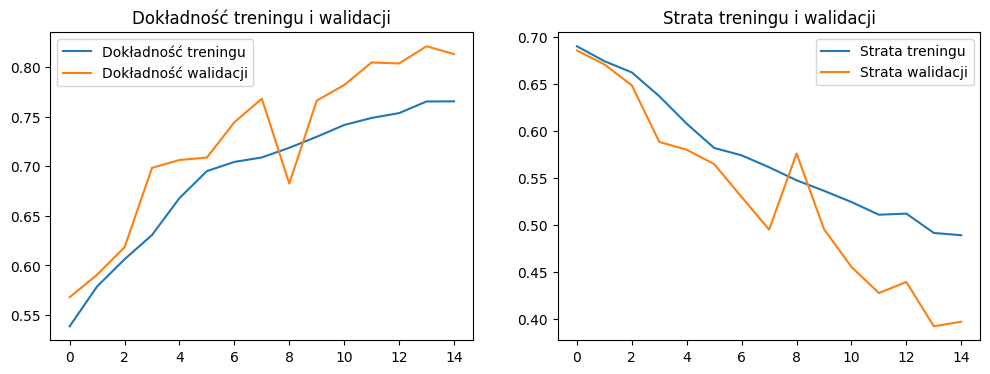

In [10]:
# Wizualizacja wyników treningu
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Dokładność treningu')
plt.plot(epochs_range, val_acc, label='Dokładność walidacji')
plt.legend()
plt.title('Dokładność treningu i walidacji')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Strata treningu')
plt.plot(epochs_range, val_loss, label='Strata walidacji')
plt.legend()
plt.title('Strata treningu i walidacji')
plt.show()

In [1]:
# Funkcja do predykcji
def predict_image(img):
    # Przygotowanie obrazu
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = tf.expand_dims(img, 0)  # Dodanie wymiaru batch
    img = img / 255.0  # Normalizacja
    
    # Predykcja
    prediction = model.predict(img)
    score = float(prediction[0])
    
    # Zwracamy wynik jako string
    if score > 0.5:
        return f"Pies (pewność: {score:.2%})"
    else:
        return f"Kot (pewność: {(1-score):.2%})"

# Tworzenie interfejsu Gradio
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(),
    outputs=gr.Text(),
    title="Klasyfikator Kotów i Psów",
    description="Wgraj zdjęcie kota lub psa, aby sprawdzić jak model je sklasyfikuje."
)

interface.launch(share=True)

NameError: name 'gr' is not defined